In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

In [9]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace = True)

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data.shape #(row,column)

(569, 31)

In [16]:
data.isnull().sum() #null değer var mı bakılır

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
# %%
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [17]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [18]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("decision tree score: ", dt.score(x_test,y_test))

decision tree score:  0.9186046511627907


In [19]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9534883720930233


In [20]:
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[53,  1],
       [ 3, 29]])

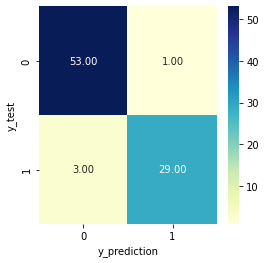

In [22]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [23]:
Acc = []
for i in range (1,100):
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier(n_estimators = i,max_depth=3,random_state = 1)
  rf.fit(x_train,y_train)
  Acc.append(rf.score(x_test,y_test))

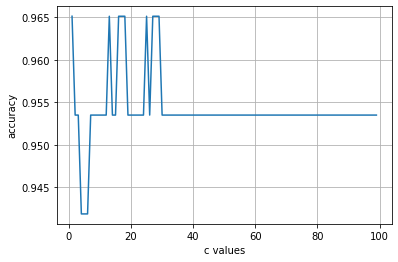

In [24]:
plt.plot(range(1,100),Acc)
plt.xlabel("c values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [25]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[53,  1],
       [ 3, 29]])

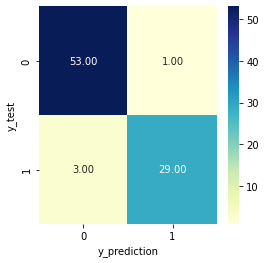

In [26]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [27]:
Acc = []
for i in range (1,6):
  for j in range(1,100):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = j,max_depth=i,random_state = 1)
    rf.fit(x_train,y_train)
    Acc.append(rf.score(x_test,y_test))

In [28]:
len(Acc)

495

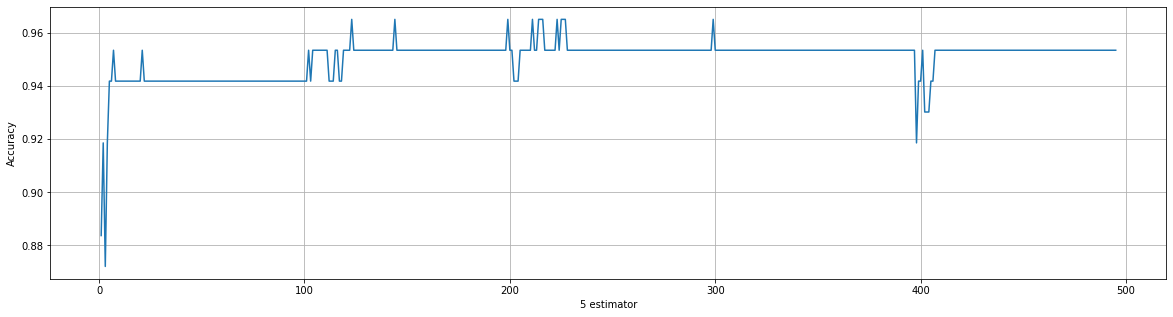

In [42]:
plt.figure(figsize=(20,5))
plt.plot(range(1,496),Acc)
plt.xlabel("5 estimator")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [30]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[53,  1],
       [ 3, 29]])

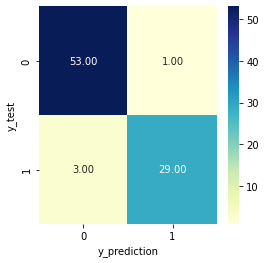

In [31]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.97      0.91      0.94        32

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors= 5)
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC(C=1)
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=1)

In [35]:
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
logreg.fit(x_train,y_train)
svm.fit(x_train,y_train)
nb.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [36]:
y_pred_dt = dt.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_logreg = logreg.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_knn = accuracy_score(y_test,y_pred_knn)
acc_logreg = accuracy_score(y_test,y_pred_logreg)
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_nb = accuracy_score(y_test,y_pred_nb)
acc_rf = accuracy_score(y_test,y_pred_rf)

In [39]:
print("Accuracy Score of Decision Tree : ",acc_dt)
print("Accuracy Score of KNN : ",acc_knn)
print("Accuracy Score of Logistic Regression : ",acc_logreg)
print("Accuracy Score of SVM : ",acc_svm)
print("Accuracy Score of Naive Bayes : ",acc_nb)
print("Accuracy Score of Random Forest : ",acc_rf)

Accuracy Score of Decision Tree :  0.965034965034965
Accuracy Score of KNN :  0.951048951048951
Accuracy Score of Logistic Regression :  0.958041958041958
Accuracy Score of SVM :  0.965034965034965
Accuracy Score of Naive Bayes :  0.9440559440559441
Accuracy Score of Random Forest :  0.9440559440559441


In [40]:
from sklearn.metrics import confusion_matrix
cm_matrix_dt=confusion_matrix(y_test, y_pred_dt)
cm_matrix_knn=confusion_matrix(y_test, y_pred_knn)
cm_matrix_logreg=confusion_matrix(y_test, y_pred_logreg)
cm_matrix_svm=confusion_matrix(y_test, y_pred_svm)
cm_matrix_nb=confusion_matrix(y_test, y_pred_nb)
cm_matrix_rf=confusion_matrix(y_test, y_pred_nb)

print("DT:", cm_matrix_dt)
print("KNN:" ,cm_matrix_knn)
print("LG:" ,cm_matrix_logreg)
print("SVM:" ,cm_matrix_svm)
print("NB:" ,cm_matrix_nb)
print("RF:" ,cm_matrix_rf)

DT: [[86  2]
 [ 3 52]]
KNN: [[87  1]
 [ 6 49]]
LG: [[88  0]
 [ 6 49]]
SVM: [[87  1]
 [ 4 51]]
NB: [[85  3]
 [ 5 50]]
RF: [[85  3]
 [ 5 50]]


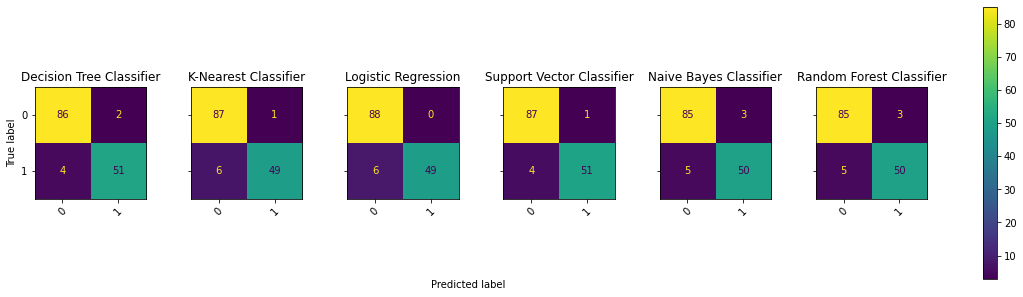

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 100,random_state = 1),
}

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=1)

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(x_train, y_train).predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.4, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()